# [*Lab Project Part 2*]() CNNs for Image Classification
------------------------------

### General Guideline
1. Aim:
    - *Understand  the  basic  Image  Classification/Recognition  pipeline  and  the  data-driven  approach (train/predict stages).*
    - *Get used to one of deep learning frameworks (e.g. PyTorch).*
2. Prerequisite:
    - *Familiar with python and relevant packages.*
    - *Known the basic knowledge of Convolutional Neural Networks*

### PyTorch versions
we assume that you are using latest PyTorch version(>=1.4)

### PyTorch Tutorial & Docs
You can learn pytorch from the [tutorial link](https://pytorch.org/tutorials/). The Docs information can be searched at [Docs](https://pytorch.org/docs/stable/index.html). In this assignments, we wish you to form the basic capability of using one of the well-known frameworks for deep learning tasks.  

## Session 1: Image Classifiation on CIFAR 10
### Install pytorch and run the given codes

In [1]:
#####################################################
# referenced codes: https://pytorch.org/tutorials/
# referenced codes: http://cs231n.stanford.edu/
# referenced codes: https://cs.stanford.edu/~acoates/stl10/
######################################################
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data


####  *` Q2.1: test dataloader and show the images of each class  of CIFAR10`*  

In [3]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

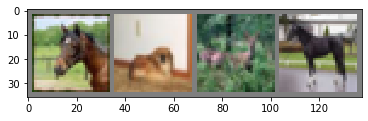

horse   dog  deer horse


In [4]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

####  *` Q2.2: Architecture understanding. Implement architecture of TwolayerNet and ConvNet.`*  

In [5]:
class TwolayerNet(nn.Module):
    # assign layer objects to class attributes
    # nn.init package contains convenient initialization methods
    # http://pytorch.org/docs/master/nn.html#torch-nn-init
    def __init__(self,input_size ,hidden_size ,num_classes ):
        '''
        :param input_size: 3*32*32
        :param hidden_size: decide by yourself e.g. 1024, 512, 128 ...
        :param num_classes: 
        '''
        ################################
        # Todo: finish the code
        ################################
        
    def forward(self,x):
        # flatten
        x = x.view(x.shape[0], -1)
        scores = self.fc2(F.relu(self.fc1(x)))
        return scores


In [7]:
class ConvNet(nn.Module):
    # Complete the code using LeNet-5
    # reference: https://ieeexplore.ieee.org/document/726791
    def __init__(self):
        ################################
        # Todo: finish the code
        ################################
        
    def forward(self, x):
        ################################
        # Todo: finish the code
        ################################
        
        return x

In [16]:
## exmample. You can change and modify it if you like.
## use the above defined trainloader directly and train the models 
def train(net, trainloader,epoch=1):
    ###################### Define Loss function and optimizer
    
    ############################### Training
    for epoch in range(epoch):  # loop over the dataset multiple times 

        ################################
        # Todo: finish the code
        ################################

    print('Finished Training')

####  Train Two-layer Net

In [13]:
################################
# Todo: finish the code
################################

#### Train ConvNet - LeNet-5

In [25]:
################################
# Todo: finish the code
################################

In [22]:
def valid(net,testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
            100 * correct / total))

In [23]:
def valid_class(net,testloader,classes):
    class_correct = list(0. for i in range(len(classes)))
    class_total = list(0. for i in range(len(classes)))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    for i in range(len(classes)):
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))

####  *` Q2.3: Preparation of training. Create Dataloader yourself and define Transform, optimizer.`*  

#### *` Complement  CIFAR10_loader()`*

In [32]:
###  suggested reference: https://pytorch.org/tutorials/recipes/recipes/custom_dataset_transforms_loader.html?highlight=dataloader
# functions to show an image

class CIFAR10_loader(Dataset):
    def __init__(self,root,train=True,transform = None):
        
        ################################
        # Todo: finish the code
        ################################
        

    def __len__(self):
        return len(self.data)

    def __getitem__(self, item):
        ################################
        # Todo: finish the code
        ################################

        return img, target

#### *` Complement Transform function and Optimizer`*

In [44]:
transform_train = 

transform_test = 

optimizer = 

#### *` Train the ConvNet with CIFAR10_loader, transform and optimizer you implemented and compare the results`*

In [45]:
def train(net, trainloader,epoch=1):
    ###################### Define Loss function and optimizer
    
    ############################### Training
    for epoch in range(epoch):  # loop over the dataset multiple times 

        ################################
        # Todo: finish the code
        ################################

    print('Finished Training')

#### *` Q2.4 Setting up the hyperparameters.`*

#### *`Play with convNet and TwolayerNet, set up the hyperparameters and reach the accuracy as high as you can`*

In [24]:
################################
# Todo: finish the code
################################

#### *` test the accuracy of ConvNet `*

In [ ]:
################################
# Todo: finish the code
################################

#### *`test the accuracy of TwolayerNet`*

In [ ]:
################################
# Todo: finish the code
################################

## Session 2:  Finetuning the ConvNet
### STL-10 DATASET
> The provided network is trained on a different dataset named CIFAR-10 , which
contains the images of 10 different object categories. The dataset we use throughout the assignment is a subset of STL-10 
with larger sizes and different object classes. So, there is a discrepancy between the
dataset we use to train (CIFAR-10) and test (STL-10) our network. One solution
would be to train the whole network from scratch. However, the number of param-
eters are too large to be trained properly with such few number of images provided.
One solution is to shift the learned weights in a way to perform well on the test
set, while preserving as much information as necessary from the training class.
### In this Session, extract 5 classes from STL training dataset , 
the the label of images can be defined as `{1: 'airplanes',2:'birds',3:'ships',4:'cats',5:'dogs'}`

#### *`Q3.1 create the STL10_Dataset `*

In [49]:
from stl10_data import *
class STL10_Dataset(Dataset):
    def __init__(self,root,train=True,transform = None):
        ################################
        # Todo: finish the code
        ################################

 

    def __len__(self):
        ################################
        # Todo: finish the code
        ################################

    def __getitem__(self, item):
        ################################
        # Todo: finish the code
        ################################

        return img, target


#### *`Q3.2  Finetuning from ConvNet & train the model and show the results`*

In [27]:
################################
# Todo: finish the code
################################

###  `Bonus`

In [52]:
pass